In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, normaltest
import seaborn as sns

sns.set_theme()

In [2]:
df = yf.download("^NSEI")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0
...,...,...,...,...,...,...
2023-12-29,21737.650391,21770.300781,21676.900391,21731.400391,21731.400391,270900
2024-01-02,21751.349609,21755.599609,21555.650391,21665.800781,21665.800781,263700
2024-01-03,21661.099609,21677.000000,21500.349609,21517.349609,21517.349609,311900


In [3]:
df["Returns"] = df.Close.pct_change()
df = df.dropna()
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2023-12-29,21737.650391,21770.300781,21676.900391,21731.400391,21731.400391,270900,-0.002172
2024-01-02,21751.349609,21755.599609,21555.650391,21665.800781,21665.800781,263700,-0.003019
2024-01-03,21661.099609,21677.000000,21500.349609,21517.349609,21517.349609,311900,-0.006852
2024-01-04,21605.800781,21685.650391,21564.550781,21658.599609,21658.599609,339200,0.006564
2024-01-05,21705.750000,21749.599609,21629.199219,21710.800781,21710.800781,309300,0.002410


<Axes: xlabel='Date'>

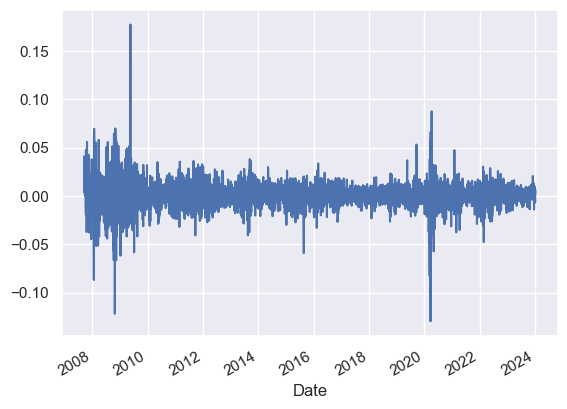

In [4]:
df.Returns.plot()

<Axes: xlabel='Returns', ylabel='Density'>

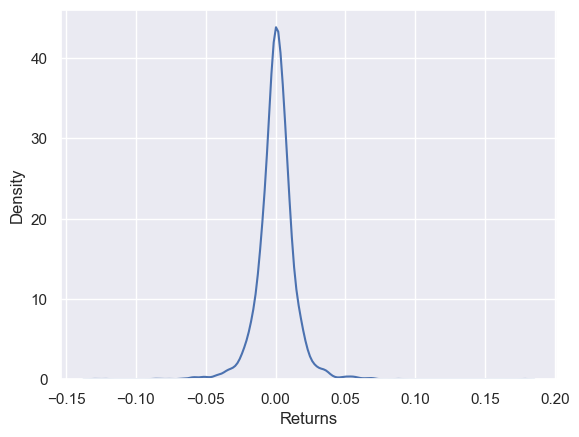

In [5]:
sns.kdeplot(df.Returns)

In [10]:
print(
    "Mean = %.5f\nStandard Deviation = %.3f\nSkew = %.3f\nKurtosis = %.3f"
    % (df.Returns.mean(), df.Returns.std(), skew(df.Returns), kurtosis(df.Returns))
)

Mean = 0.00049
Standard Deviation = 0.014
Skew = 0.066
Kurtosis = 15.301


In [15]:
annual_ret = (1 + df.Returns.mean()) ** 252 - 1
annual_vol = df.Returns.std() * np.sqrt(252)

s = (annual_ret - 0.0721) / annual_vol
print("Sharpe ratio = %.4f" % s)

Sharpe ratio = 0.2706
